In [1]:
from matplotlib import pyplot
import numpy

In [2]:
random_image = numpy.random.uniform(low = 0, high = 3, size = (6, 6))
random_image = numpy.uint8(random_image)

In [3]:
histogram = numpy.histogram(random_image, bins = 4)

In [4]:
pyplot.bar(left = [0, 1, 2, 3], height = histogram[0], align = "center", width = 0.3)

/Users/sedarolmez/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


<Container object of 4 artists>

In [5]:
pyplot.xticks([0, 1, 2, 3], fontsize = 20)
pyplot.yticks(numpy.arange(0, 15, 2), fontsize = 20)

([<matplotlib.axis.YTick at 0x109653a90>,
 <a list of 8 Text yticklabel objects>)

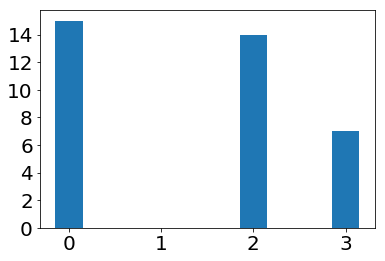

In [8]:
pyplot.show()

In [34]:
import skimage.feature

In [35]:
array = numpy.array([
    [3, 2, 2, 0, 3],
    [1, 3, 0, 2, 2],
    [2, 2, 2, 2, 3],
    [3, 3, 3, 2, 3],
    [0, 2, 3, 2, 2]])

In [37]:
clmt = skimage.feature.greycomatrix(image = array, distances = [1], angles = [0], levels = 4)

In [43]:
clmt

array([[[[0]],

        [[0]],

        [[2]],

        [[1]]],


       [[[0]],

        [[0]],

        [[0]],

        [[1]]],


       [[[1]],

        [[0]],

        [[6]],

        [[3]]],


       [[[1]],

        [[0]],

        [[3]],

        [[2]]]], dtype=uint32)

```
0, 0, 2, 1
0, 0, 0, 1
1, 0, 6, 3
1, 0, 3, 2
```

In [45]:
clmt.shape

(4, 4, 1, 1)

In [46]:
co_mat = skimage.feature.greycomatrix(image = array, distances = [1, 4], 
                                     angles = [0, 45, 90], levels = 4)

In [47]:
co_mat

array([[[[0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0]],

        [[2, 2, 2],
         [1, 1, 1]],

        [[1, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0]],

        [[0, 1, 1],
         [1, 0, 0]],

        [[1, 0, 0],
         [0, 1, 0]]],


       [[[1, 1, 1],
         [0, 0, 1]],

        [[0, 0, 0],
         [0, 0, 0]],

        [[6, 3, 3],
         [0, 1, 0]],

        [[3, 4, 5],
         [1, 1, 0]]],


       [[[1, 0, 1],
         [0, 0, 0]],

        [[0, 0, 1],
         [0, 0, 0]],

        [[3, 3, 4],
         [0, 1, 0]],

        [[2, 2, 2],
         [2, 1, 1]]]], dtype=uint32)

In [51]:
co_mat.shape

(4, 4, 2, 3)

In [52]:
co_mat[:, :, 0, 0]

array([[0, 0, 2, 1],
       [0, 0, 0, 1],
       [1, 0, 6, 3],
       [1, 0, 3, 2]], dtype=uint32)

Because there are now 2 distances and 3 angles, the total number returned GLCMs is 2 * 3 = 6. To return the GLCM at `distance 1` and angle 0(degrees), the indexing would be `co_mat[:, :, 0, 0]` this returns the complete 4 * 4 GLCM, but only for `distance(1)` and first `angle (0)`. To return the GLCM corresponding to `distance 4` and `angle 90`, the indexing will be as follows:
`co_mat[:, :, 1, 2]`

The previously calculated GLCMs are useful for learning how many times each intensity
level co-occurs with each other. We can benefit from such information to predict
the probability of co-occurrence between each two intensity levels. One benefit from normalizing the GLCM is that all elements in the output matrix
are in the same scale from 0.0 to 1.0.

In [49]:
co_mat_normalised = skimage.feature.greycomatrix(image = array, distances = [1],
                                                angles = [0], levels = 4, normed = True)

In [50]:
co_mat_normalised[:,:,0,0]

array([[ 0.  ,  0.  ,  0.1 ,  0.05],
       [ 0.  ,  0.  ,  0.  ,  0.05],
       [ 0.05,  0.  ,  0.3 ,  0.15],
       [ 0.05,  0.  ,  0.15,  0.1 ]])